# Assessment: Part 2 - Optimisation
<br>

## Task: Optimise a timetable so that session is scheduled once per week in such a way that timetable constraints are minimised. 
<br>

### Relevant constraints for this assessment are: 

- A session cannot be scheduled for a time when any of its students or staff are in another session (concurrence constraints). The sessions for a module that clash are shown in the data file.
- A lab session cannot occur in the week before its corresponding lecture has taken place (precedence constraints).
<br>
<br>

### Packages needed:

- pandas
- numpy
- matplotlib

### 2.1 – Generation of random solutions

#### Importing libraries

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

#### Reading the file and splitting it

In [2]:
filepath = "./Modules.txt"

#Read file
file = open(filepath, 'r')
contents = file.read()
file.close()

#split it on each line
fileContents = contents.split("\n")

#different arrays
module_clashes = []
modules = []
labs = []
amount_labs = []

#put respective elements into array
for i in range(len(fileContents)):
    module_clashes.append(fileContents[i].split("|"))
    modules.append(module_clashes[i].pop(0))
    module_clashes[i].pop(0)
    labs.append(module_clashes[i].pop(0))

#split the module clashes into individual elements
for x in range(len(module_clashes)):
    module_clashes[x].append(module_clashes[x][0].split(","))
    module_clashes[x].pop(0)

# put the number of labs into an int list
for i in range(len(labs)):
    amount_labs.append(int(labs[i][0]))


print(f"Modules List: {modules}")
print(f"Number of Labs per Module List: {amount_labs}")
for i in range(len(modules)):
    print(f"Modules Clashes with: {modules[i]} clashes with {module_clashes[i]} ")

Modules List: ['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013', 'MOD014', 'MOD015', 'MOD016', 'MOD017']
Number of Labs per Module List: [2, 2, 2, 1, 2, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 1]
Modules Clashes with: MOD001 clashes with [['MOD002', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD013']] 
Modules Clashes with: MOD002 clashes with [['MOD001', 'MOD003', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD013']] 
Modules Clashes with: MOD003 clashes with [['MOD001', 'MOD002', 'MOD004', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013']] 
Modules Clashes with: MOD004 clashes with [['MOD001', 'MOD002', 'MOD003', 'MOD005', 'MOD006', 'MOD007', 'MOD008', 'MOD009', 'MOD010', 'MOD011', 'MOD012', 'MOD013']] 
Modules Clashes with: MOD005 clashes with [['MOD001', 'MOD002', 'MOD003', 'MOD004', 'MOD006', 'MOD007', 'MO

#### Concurrent Constraints - A session cannot be scheduled for a time when any of its students or staff are in another session

#### Precedence Constraints - A lab session cannot occur in the week before its corresponding lecture has taken place

In [3]:
def concurrent_clashes(lab, module):

    concurrent_constraints = 0
    precedence_constraints = 0

    #take shortest length
    if len(lab) < len(module):
        count = len(lab)
    else:
        count = len(module)

    # check here for both constraints. First for loop looks for if two sessions have the same time period
    # second for loop looks for if the lab session occurs before the lecture of that module
    for i in range(count):
        if module[i] == lab[i]:
            concurrent_constraints = concurrent_constraints + 1
        for j in range(i):
            if j < i:
                if module[j] == lab[j]:
                    precedence_constraints = precedence_constraints + 1
                    break

    return concurrent_constraints, precedence_constraints

#### Concurrent Constraints - A session cannot be scheduled for a time when any of its students or staff are in another session

In [4]:
def modules_clashes(lab, clash, module):

    concurrent_constraints = 0
    module_element = np.array_split(modules, 17)
    
    for i in range(len(module_element)):
        for j in range(len(clash[i])):
            module_element[i] = np.concatenate([module_element[i], clash[i][j]])

    #take shortest length
    if len(lab) < len(module):
        count = len(lab)
    else:
        count = len(module)

    #find matching module
    for i in range(count):
        for j in range(len(module_element)):
            if module[i] == module_element[j][0]:
                if lab[i] is not None and lab[i] in module_element[j] and lab[i] != module_element[j][0]:
                    concurrent_constraints = concurrent_constraints + 1
                    break

    return concurrent_constraints

#### Total Constraints

In [5]:
def total_constraints(timetable, clash):

    # we generate our int lists of constraints here 
    # concurrent has 4 because there is 2 rows of labs for each function to calculate the amount of concurrent constraints
    # whereas precedence constraints happen less often than concurrent constraints
    concurrent_constraints = [int] * 4
    precedence_constraints = [int] * 2
    total_concurrent_constraints = 0
    total_precedence_constraints = 0

    # calculating the number of constraints for each module and lab
    concurrent_constraints[0], precedence_constraints[0] = concurrent_clashes(timetable[1], timetable[0])
    concurrent_constraints[1], precedence_constraints[1] = concurrent_clashes(timetable[2], timetable[0])
    concurrent_constraints[2] = modules_clashes(timetable[1], clash, timetable[0])
    concurrent_constraints[3] = modules_clashes(timetable[2], clash, timetable[0])

    #totalling constraints
    for x in range(len(concurrent_constraints)):
        total_concurrent_constraints = total_concurrent_constraints + concurrent_constraints[x]
    for y in range(len(precedence_constraints)):
        total_precedence_constraints = total_precedence_constraints + precedence_constraints[y]

    return total_concurrent_constraints, total_precedence_constraints

#### Calculating fitness

In [6]:
def return_fitness(timetable): 

    total_concurrent_constraints, total_precedence_constraints = total_constraints(timetable, module_clashes)
    fitness = total_concurrent_constraints * total_precedence_constraints

    return(fitness)

#### Generating random timetable

In [7]:
def generate_timetable():
    #lists
    lectures = []
    lab_1 = []
    lab_2 = []
    lab_sessions = []

    #generating X of lab sessions per module
    for i in range(len(modules)):
        for j in range(len(labs[i])):
            lab_sessions.append(modules[i])

    #add each module into a lecture array 
    for i in range(len(modules)):
        lectures.append(modules[i])

    # as we have 40 lab slots in our timetable and we have 31 lab sessions it will put in the amount of labs per module that we generated above
    for i in range(len(lab_sessions)):
        if i <= 20:
            lab_1.append(lab_sessions[i])
        if i > 20 and i < len(lab_sessions):
            lab_2.append(lab_sessions[i])

    #array for timetable
    timetable = np.empty([3, 20], dtype=object)
    
    #fill each column
    for i in range(len(lectures)):
        timetable[0][i] = lectures[i]
    for i in range(len(lab_1)):
        timetable[1][i] = lab_1[i]
    for i in range(len(lab_2)):
        timetable[2][i] = lab_2[i]

    # Shuffle the lectures and labs so the solution is random.
    random.shuffle(timetable[0])
    random.shuffle(timetable[1])
    random.shuffle(timetable[2])
    
    #get fitness of current timetable
    fitness = return_fitness(timetable)
    

    print(len(lab_sessions))
    return timetable, fitness

generate_timetable()


17


(array([['MOD005', 'MOD006', 'MOD008', 'MOD010', 'MOD017', None, None,
         'MOD002', 'MOD016', 'MOD007', 'MOD015', 'MOD013', 'MOD011',
         'MOD009', 'MOD012', 'MOD003', 'MOD014', 'MOD004', None, 'MOD001'],
        [None, None, 'MOD007', 'MOD017', 'MOD010', 'MOD004', 'MOD002',
         None, 'MOD011', 'MOD014', 'MOD016', 'MOD005', 'MOD013', 'MOD001',
         'MOD008', 'MOD015', 'MOD006', 'MOD012', 'MOD003', 'MOD009'],
        [None, None, None, None, None, None, None, None, None, None, None,
         None, None, None, None, None, None, None, None, None]],
       dtype=object),
 154)

### 2.2 – Algorithm implementation

#### Ruin and Recreate Mutation - generates a completely new solution at random

In [8]:
def ruin_recreate(parent):
    child = parent.copy()
    for i in range(len(child)):
        random.shuffle(child[i])
    return child

#### Session Replace Mutation - placing a session into another slot in the timetable

In [9]:
def session_replace(parent):
    child = parent.copy()
    idx = random.randint(0, 2)
    session_1 = random.randint(0, 19)
    session_2 = random.randint(0, 19)
    
    if idx == 1 or idx == 2:
        idx_2 = random.randint(1, 2)
        child[idx][session_1], child[idx_2][session_2] = child[idx_2][session_2], child[idx][session_1]
    else:
        child[idx][session_1], child[idx][session_2] = child[idx][session_2], child[idx][session_1]
    return child

In [10]:
def less_than_equal(a ,b):
    return a <= b

#### Hillclimber:

- generating random solution
- using either mutation
- generate a child through mutation
- compare parent and child's fitness
- return best fitness

In [11]:
def hillclimber(N, generate_timetable, mutation, comparison, run_number, iteration_fitness):

    #random solution
    parent, parent_fitness = generate_timetable()
    timetable = []
    for i in range(N):

        if i == N - 1:
            timetable.append(parent)

        iteration_fitness[i][run_number] = parent_fitness
        
        # Generate child through mutation
        child = mutation(parent)

        # Evaluate fitness
        child_fitness = return_fitness(child)

        # compare parent and child
        if comparison(child_fitness, parent_fitness):
            parent = child
            parent_fitness = child_fitness

    return parent, parent_fitness, timetable

###  2.3 – Visualisation of results

In [12]:
def plot_graph(RuinAndRecreate_fitness, SessionReplace_fitness):

    Average_RuinAndRecreate_fitness = []
    Average_SessionReplace_fitness = []
    Min_RuinAndRecreate_fitness = []
    Min_SessionReplace_fitness = []
    Max_RuinAndRecreate_fitness = []
    Max_SessionReplace_fitness = []
    
    for x in range(500):
        #average
        total1 = 0
        total2 = 0
        for y in range(30):
            total1 = total1 + RuinAndRecreate_fitness[x][y]
            total2 = total2 + SessionReplace_fitness[x][y]
        Average_RuinAndRecreate_fitness.append(total1 / len(RuinAndRecreate_fitness[x]))
        Average_SessionReplace_fitness.append(total2 / len(SessionReplace_fitness[x]))

    sort1 = []
    sort2 = []
    for x in range(500):
        sort1.append(sorted(RuinAndRecreate_fitness[x]))
        sort2.append(sorted(SessionReplace_fitness[x]))
        Min_RuinAndRecreate_fitness.append(sort1[x][0])
        Min_SessionReplace_fitness.append(sort2[x][0])
        Max_RuinAndRecreate_fitness.append(sort1[x][-1])
        Max_SessionReplace_fitness.append(sort2[x][-1])
        

        
    # Plot the data in to a graph
    iterations = np.arange(500)

    plt.plot(iterations, Max_RuinAndRecreate_fitness, label = "Ruin and Recreate Max Fitness")
    plt.plot(iterations, Average_RuinAndRecreate_fitness, label = "Ruin and Recreate Average Fitness")
    plt.plot(iterations, Min_RuinAndRecreate_fitness, label = "Ruin and Recreate Min Fitness")

    plt.plot(iterations, Max_SessionReplace_fitness, label = "Session Replace Max Fitness")
    plt.plot(iterations, Average_SessionReplace_fitness, label = "Session Replace Average Fitness")
    plt.plot(iterations, Min_SessionReplace_fitness, label = "Session Replace Min Fitness")

    plt.title("Timetable Fitness Scores")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness Score")
    plt.legend(loc=(1,0.5))
    plt.show()


17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
Ruin and Recreate: [36, 18, 50, 48, 48, 32, 32, 48, 56, 36, 44, 52, 44, 33, 36, 39, 40, 54, 60, 44, 20, 36, 36, 22, 55, 33, 24, 45, 40, 40]
Session Replace: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Example timetable using Ruin and Recreate: 
[[['MOD012' 'MOD010' 'MOD009' 'MOD004' 'MOD002' 'MOD005' 'MOD016'
   'MOD003' 'MOD008' 'MOD011' 'MOD013' 'MOD014' 'MOD015' 'MOD006'
   'MOD017' None 'MOD001' 'MOD007' None None]
  ['MOD010' 'MOD007' 'MOD005' 'MOD017' 'MOD013' 'MOD003' 'MOD001'
   'MOD011' 'MOD015' 'MOD002' 'MOD012' None None 'MOD014' 'MOD004'
   'MOD016' 'MOD006' None 'MOD008' 'MOD009']
  [None None None None None None None None None None None None None None
   None None None None None None]]]
Example timetable using Session Replace: 
[[['MOD006' 'MOD017' 

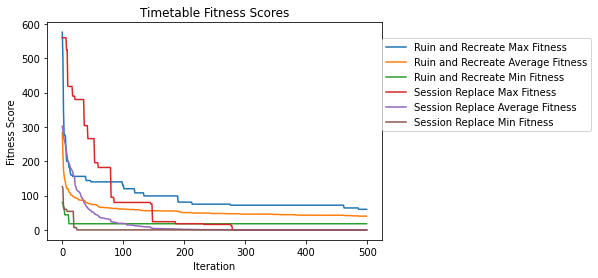

In [13]:
def results():

    RuinNRecreate = np.empty([500, 30], dtype = int)
    SessionReplace = np.empty([500, 30], dtype = int)
    #array for timetable
    timetableRR = np.empty([3, 20], dtype=object)
    timetableSS = np.empty([3, 20], dtype=object)
    sessionReplaceList = []
    RuinNRecreateList = []
    

    for nth in range(30):

        # Run hillclimber here
        solution, fitness, timetable = hillclimber(500, generate_timetable, ruin_recreate, less_than_equal, nth, RuinNRecreate)
        solution2, fitness2, timetable2 = hillclimber(500, generate_timetable, session_replace, less_than_equal, nth, SessionReplace)
        sessionReplaceList.append(fitness2)
        RuinNRecreateList.append(fitness)
        timetableRR = np.array(timetable)
        timetableSS = np.array(timetable2)

    print(f"Ruin and Recreate: {RuinNRecreateList}")
    print(f"Session Replace: {sessionReplaceList}")
    print(f"Example timetable using Ruin and Recreate: \n{timetableRR}")
    print(f"Example timetable using Session Replace: \n{timetableSS}")
    
    plot_graph(RuinNRecreate, SessionReplace)
    
results()

#### Conclusion

The results show that the Session Replace operator is significantly better for optimising a timetable. As you can see, the maximum fitness of the Session Replace operator has levelled out better than the best fitness of the Ruin and Recreate operator after about 225 iterations. And also the Session Replace fitnesses seems to decrease exponentially over time, this is due to replacing the sessions that are causing the constraints to tally up which correlates to the fitness of the operator. Whereas the Ruin and Recreate operator destroys the existing solution and generates a new solution.
